In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict

In [ ]:


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
data = r'/content/drive/MyDrive/rephrasing/df_checked.csv'
df = pd.read_csv(data)

In [ ]:
output_path = r'/content/drive/MyDrive/rephrasing/new_plots/hist/'

In [ ]:
import math

## Preprocessing

Count the "Failed" with value True:

In [ ]:
print(len(df[df['failed'] == True]))


0


In [ ]:
df.shape

(275, 31)

In [ ]:
df.head()

,experiment_id,review_id,trial_no,review_text,rephrased_text,explanation,sens_orig_avg,sens_reph_avg,info_orig_avg,info_reph_avg,sens_orig_var,sens_reph_var,info_orig_var,info_reph_var,sens_orig,sens_reph,info_orig,info_reph,failed,detection,sens_or (0-10),sens_reph (0-10),info_or (0-10),info_reph (0-10),comments,2_detection,2_sens_or (0-10),2_sens_reph (0-10),2_info_or (0-10),2_info_reph (0-10),2_comments
0,20,0,1,My husbands ortho doctor suggested him using...,A medical professional suggested the use of Tu...,I removed explicit mention of the user being t...,5.625,0.75,7.25,7.25,2.553571,0.785714,0.5,0.5,3.0,0,8.0,8.0,False,N,8,8.0,8,8.0,"the rephrasing is the same, the detection is a...",N,6,5.0,7,6.0,nearly the same
1,20,0,2,My husbands ortho doctor suggested him using...,A health professional recommended this Turmeri...,I replaced specific reference to the husband's...,5.625,0.75,7.25,7.25,2.553571,0.785714,0.5,0.5,5.0,0,8.0,8.0,False,Y,8,4.0,8,8.0,NaN,Y,7,3.0,7,6.0,NaN
2,20,0,3,My husbands ortho doctor suggested him using...,Turmeric Curcumin was suggested to help with k...,The rephrased review does not directly state t...,5.625,0.75,7.25,7.25,2.553571,0.785714,0.5,0.5,6.0,2,8.0,8.0,False,Y,8,5.0,8,8.0,NaN,Y,6,3.0,6,6.0,NaN
3,20,0,5,My husbands ortho doctor suggested him using...,This Turmeric Curcumin product was recommended...,"In the sanitized version, I've omitted the spe...",5.625,0.75,7.25,7.25,2.553571,0.785714,0.5,0.5,6.0,2,7.0,7.0,False,Y,8,3.0,8,8.0,NaN,Y,6,4.0,6,5.0,NaN
4,20,0,6,My husbands ortho doctor suggested him using...,This Turmeric Curcumin product was suggested b...,"The health status of the reviewer’s husband, h...",5.625,0.75,7.25,7.25,2.553571,0.785714,0.5,0.5,7.0,0,7.0,7.0,False,Y,7,4.0,8,8.0,NaN,Y,6,3.0,6,6.0,NaN


In [ ]:
score_h = ['sens_or (0-10)', 'sens_reph (0-10)', 'info_or (0-10)', 'info_reph (0-10)','detection', 'comments']

In [ ]:
df.isnull().sum()

experiment_id           0
review_id               0
trial_no                0
review_text             0
rephrased_text         46
explanation            76
sens_orig_avg           0
sens_reph_avg           0
info_orig_avg           0
info_reph_avg           0
sens_orig_var           0
sens_reph_var           0
info_orig_var           0
info_reph_var           0
sens_orig               0
sens_reph               0
info_orig               0
info_reph               0
failed                  0
detection               0
sens_or (0-10)          0
sens_reph (0-10)       46
info_or (0-10)          0
info_reph (0-10)       46
comments              239
2_detection             0
2_sens_or (0-10)        0
2_sens_reph (0-10)     46
2_info_or (0-10)        0
2_info_reph (0-10)     46
2_comments            219
dtype: int64

In [ ]:
df['sens_reph (0-10)'].fillna(-1,inplace=True)
df['info_reph (0-10)'].fillna(-1,inplace=True)
df['2_sens_reph (0-10)'].fillna(-1,inplace=True)
df['2_info_reph (0-10)'].fillna(-1,inplace=True)

In [ ]:
df.head()

,experiment_id,review_id,trial_no,review_text,rephrased_text,explanation,sens_orig_avg,sens_reph_avg,info_orig_avg,info_reph_avg,sens_orig_var,sens_reph_var,info_orig_var,info_reph_var,sens_orig,sens_reph,info_orig,info_reph,failed,detection,sens_or (0-10),sens_reph (0-10),info_or (0-10),info_reph (0-10),comments,2_detection,2_sens_or (0-10),2_sens_reph (0-10),2_info_or (0-10),2_info_reph (0-10),2_comments
0,20,0,1,My husbands ortho doctor suggested him using...,A medical professional suggested the use of Tu...,I removed explicit mention of the user being t...,5.625,0.75,7.25,7.25,2.553571,0.785714,0.5,0.5,3.0,0,8.0,8.0,False,N,8,8.0,8,8.0,"the rephrasing is the same, the detection is a...",N,6,5.0,7,6.0,nearly the same
1,20,0,2,My husbands ortho doctor suggested him using...,A health professional recommended this Turmeri...,I replaced specific reference to the husband's...,5.625,0.75,7.25,7.25,2.553571,0.785714,0.5,0.5,5.0,0,8.0,8.0,False,Y,8,4.0,8,8.0,NaN,Y,7,3.0,7,6.0,NaN
2,20,0,3,My husbands ortho doctor suggested him using...,Turmeric Curcumin was suggested to help with k...,The rephrased review does not directly state t...,5.625,0.75,7.25,7.25,2.553571,0.785714,0.5,0.5,6.0,2,8.0,8.0,False,Y,8,5.0,8,8.0,NaN,Y,6,3.0,6,6.0,NaN
3,20,0,5,My husbands ortho doctor suggested him using...,This Turmeric Curcumin product was recommended...,"In the sanitized version, I've omitted the spe...",5.625,0.75,7.25,7.25,2.553571,0.785714,0.5,0.5,6.0,2,7.0,7.0,False,Y,8,3.0,8,8.0,NaN,Y,6,4.0,6,5.0,NaN
4,20,0,6,My husbands ortho doctor suggested him using...,This Turmeric Curcumin product was suggested b...,"The health status of the reviewer’s husband, h...",5.625,0.75,7.25,7.25,2.553571,0.785714,0.5,0.5,7.0,0,7.0,7.0,False,Y,7,4.0,8,8.0,NaN,Y,6,3.0,6,6.0,NaN


In [ ]:
df.sort_values(by='review_id', inplace=True)

In [ ]:
df.head()

,experiment_id,review_id,trial_no,review_text,rephrased_text,explanation,sens_orig_avg,sens_reph_avg,info_orig_avg,info_reph_avg,sens_orig_var,sens_reph_var,info_orig_var,info_reph_var,sens_orig,sens_reph,info_orig,info_reph,failed,detection,sens_or (0-10),sens_reph (0-10),info_or (0-10),info_reph (0-10),comments,2_detection,2_sens_or (0-10),2_sens_reph (0-10),2_info_or (0-10),2_info_reph (0-10),2_comments
0,20,0,1,My husbands ortho doctor suggested him using...,A medical professional suggested the use of Tu...,I removed explicit mention of the user being t...,5.625,0.75,7.25,7.25,2.553571,0.785714,0.5,0.5,3.0,0,8.0,8.0,False,N,8,8.0,8,8.0,"the rephrasing is the same, the detection is a...",N,6,5.0,7,6.0,nearly the same
1,20,0,2,My husbands ortho doctor suggested him using...,A health professional recommended this Turmeri...,I replaced specific reference to the husband's...,5.625,0.75,7.25,7.25,2.553571,0.785714,0.5,0.5,5.0,0,8.0,8.0,False,Y,8,4.0,8,8.0,NaN,Y,7,3.0,7,6.0,NaN
2,20,0,3,My husbands ortho doctor suggested him using...,Turmeric Curcumin was suggested to help with k...,The rephrased review does not directly state t...,5.625,0.75,7.25,7.25,2.553571,0.785714,0.5,0.5,6.0,2,8.0,8.0,False,Y,8,5.0,8,8.0,NaN,Y,6,3.0,6,6.0,NaN
3,20,0,5,My husbands ortho doctor suggested him using...,This Turmeric Curcumin product was recommended...,"In the sanitized version, I've omitted the spe...",5.625,0.75,7.25,7.25,2.553571,0.785714,0.5,0.5,6.0,2,7.0,7.0,False,Y,8,3.0,8,8.0,NaN,Y,6,4.0,6,5.0,NaN
4,20,0,6,My husbands ortho doctor suggested him using...,This Turmeric Curcumin product was suggested b...,"The health status of the reviewer’s husband, h...",5.625,0.75,7.25,7.25,2.553571,0.785714,0.5,0.5,7.0,0,7.0,7.0,False,Y,7,4.0,8,8.0,NaN,Y,6,3.0,6,6.0,NaN


## Internal consistency of human evaluation

In [ ]:
#df_plt = df[df['review_id'] == 0][['sens_or (0-10)', 'sens_reph (0-10)', 'sens_reph', 'sens_orig', 'trial_no']]

In [ ]:
from scipy.interpolate import make_interp_spline

In [ ]:
#df = df[df['review_id'] == 1]

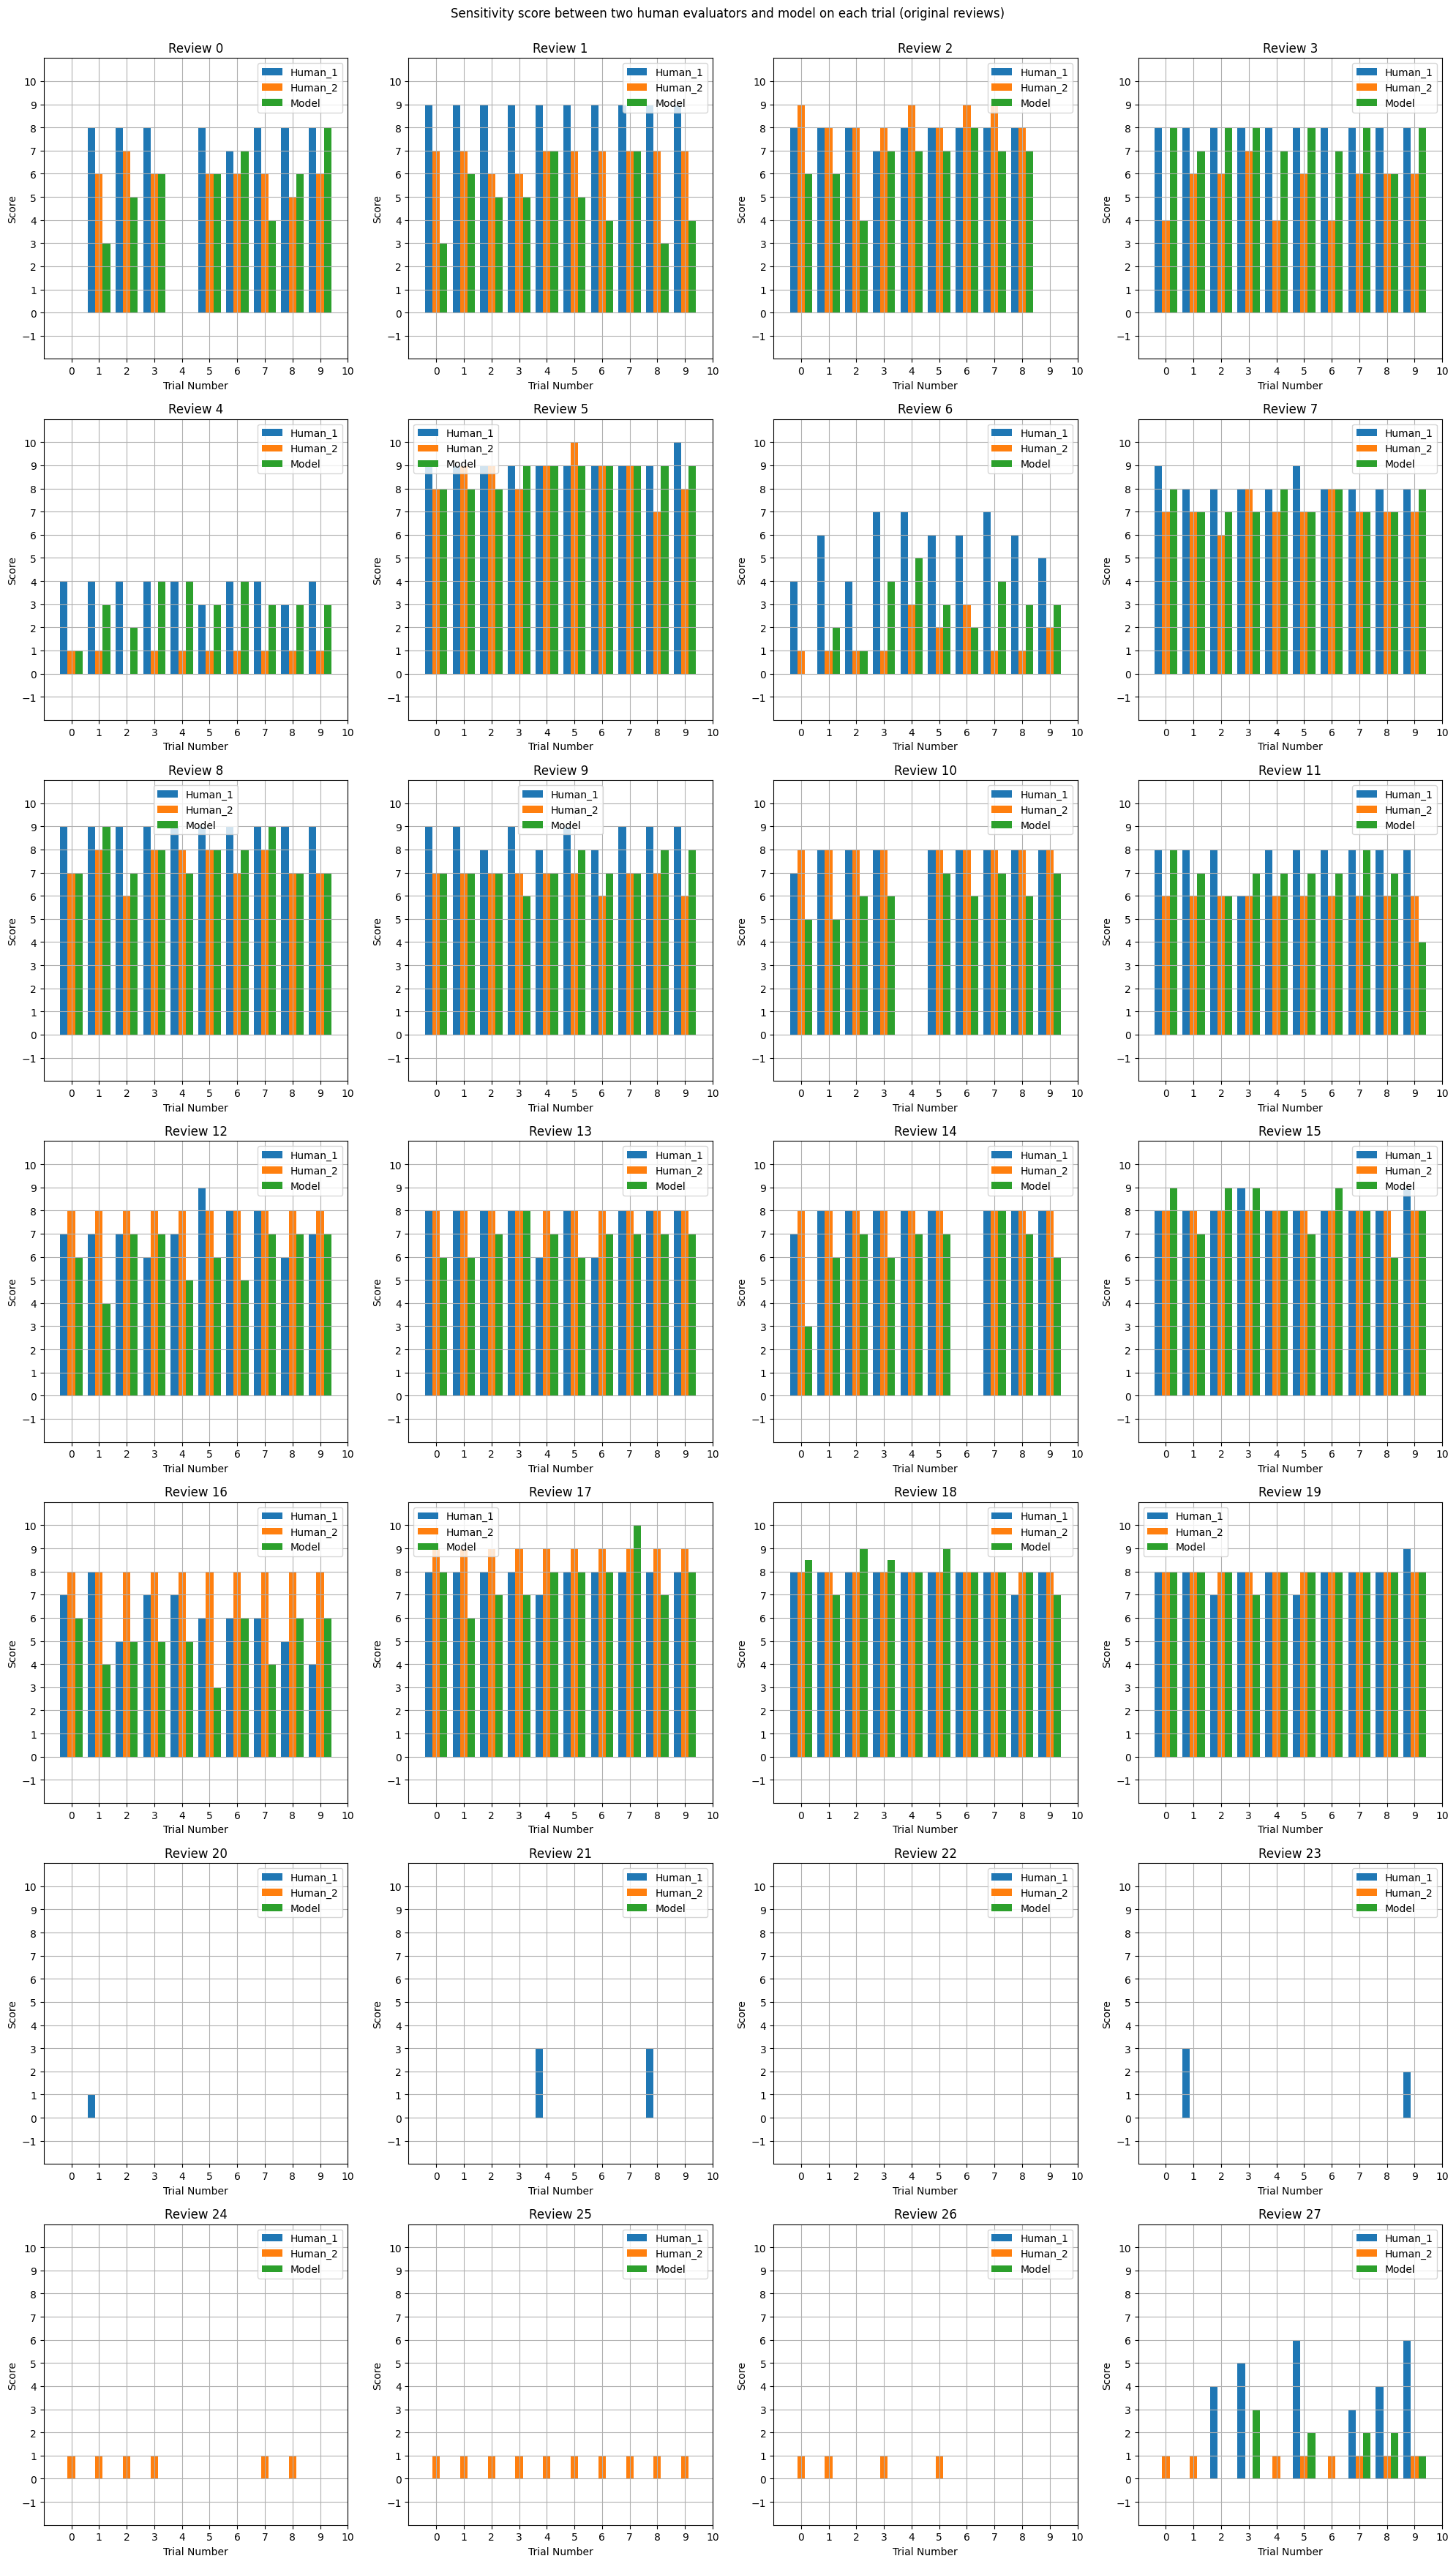

In [ ]:
########### SENS SCORE HHM ORIGINAL
unique_review_ids = df['review_id'].unique()
num_review_ids = len(unique_review_ids)
num_cols = 4  # Number of columns in the grid of subplots
num_rows = math.ceil(num_review_ids / num_cols)  # Number of rows needed

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 5*num_rows))

# Iterate over each unique review ID and plot in the subplots
for i, review_id in enumerate(unique_review_ids):
    row = i // num_cols
    col = i % num_cols

    # Filter data for the current review ID
    df_plt = df[df['review_id'] == review_id][['sens_reph', 'sens_orig', '2_sens_reph (0-10)', '2_sens_or (0-10)', 'trial_no', 'sens_reph (0-10)', 'sens_or (0-10)']]
    df_plt.sort_values(by="trial_no", inplace=True)
    trial_numbers = df_plt['trial_no']#.sort_values()
    sens_reph_scores = df_plt['sens_or (0-10)']
    sens_orig_scores = df_plt['2_sens_or (0-10)']
    model_sens_orig_scores = df_plt['sens_orig']

    # Highlight missing values and values equal to -1
    highlighted_indices_reph = sens_reph_scores[sens_reph_scores == -1].index
    highlighted_indices_orig = sens_orig_scores[sens_orig_scores == -1].index

    # Find missing values
    missing_reph = np.isnan(sens_reph_scores)
    missing_orig = np.isnan(sens_orig_scores)



    # Plot scatter points
    ax = axs[row, col] if num_rows > 1 else axs[col]
    #print(trial_numbers-0.5)
    ax.bar(trial_numbers-0.27, sens_reph_scores, label='Human_1', width=0.27)
    ax.bar(trial_numbers, sens_orig_scores, label='Human_2', width=0.27)
    ax.bar(trial_numbers+0.27, model_sens_orig_scores, label='Model', width=0.27)
    #ax.text(4, 0.5, "X")
    #ax.scatter([], [], color='red', marker='X', label='Missing')

    #ax.scatter(trial_numbers, sens_orig_scores, marker='o', label='Model score')
    #ax.bar(trial_numbers[highlighted_indices_reph]+0.5, sens_reph_scores[highlighted_indices_reph], color='red', label='Unrephrased', width=0.25)
    #ax.bar(trial_numbers[highlighted_indices_orig]+0.5, sens_orig_scores[highlighted_indices_orig], color='red', width=0.25)
    # Plot missing values
    #ax.bar(trial_numbers[missing_reph], sens_reph_scores[missing_reph], color='red')#, label='Missing sens_reph')
    #ax.bar(trial_numbers[missing_orig], sens_orig_scores[missing_orig], color='red')#, label='Missing sens_orig')

    # Adding labels and title
    ax.set_xlabel('Trial Number')
    ax.set_ylabel('Score')
    ax.set_title(f'Review {review_id}')
    ax.legend()
    ax.grid(True)

    # Set limits to ensure all numbers are represented
    ax.set_ylim(-2, 11)
    ax.set_yticks(np.arange(-1, 11, 1))
    ax.set_xlim(-1,10)
    ax.set_xticks(np.arange(0, 11, 1))
    #break

fig.suptitle('Sensitivity score between two human evaluators and model on each trial (original reviews)', y=1)
# Adjust layout and spacing
plt.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.2)  # Customize vertical and horizontal spacing between subplots
plt.savefig(output_path + 'comparison_sens_or.png')
plt.show()

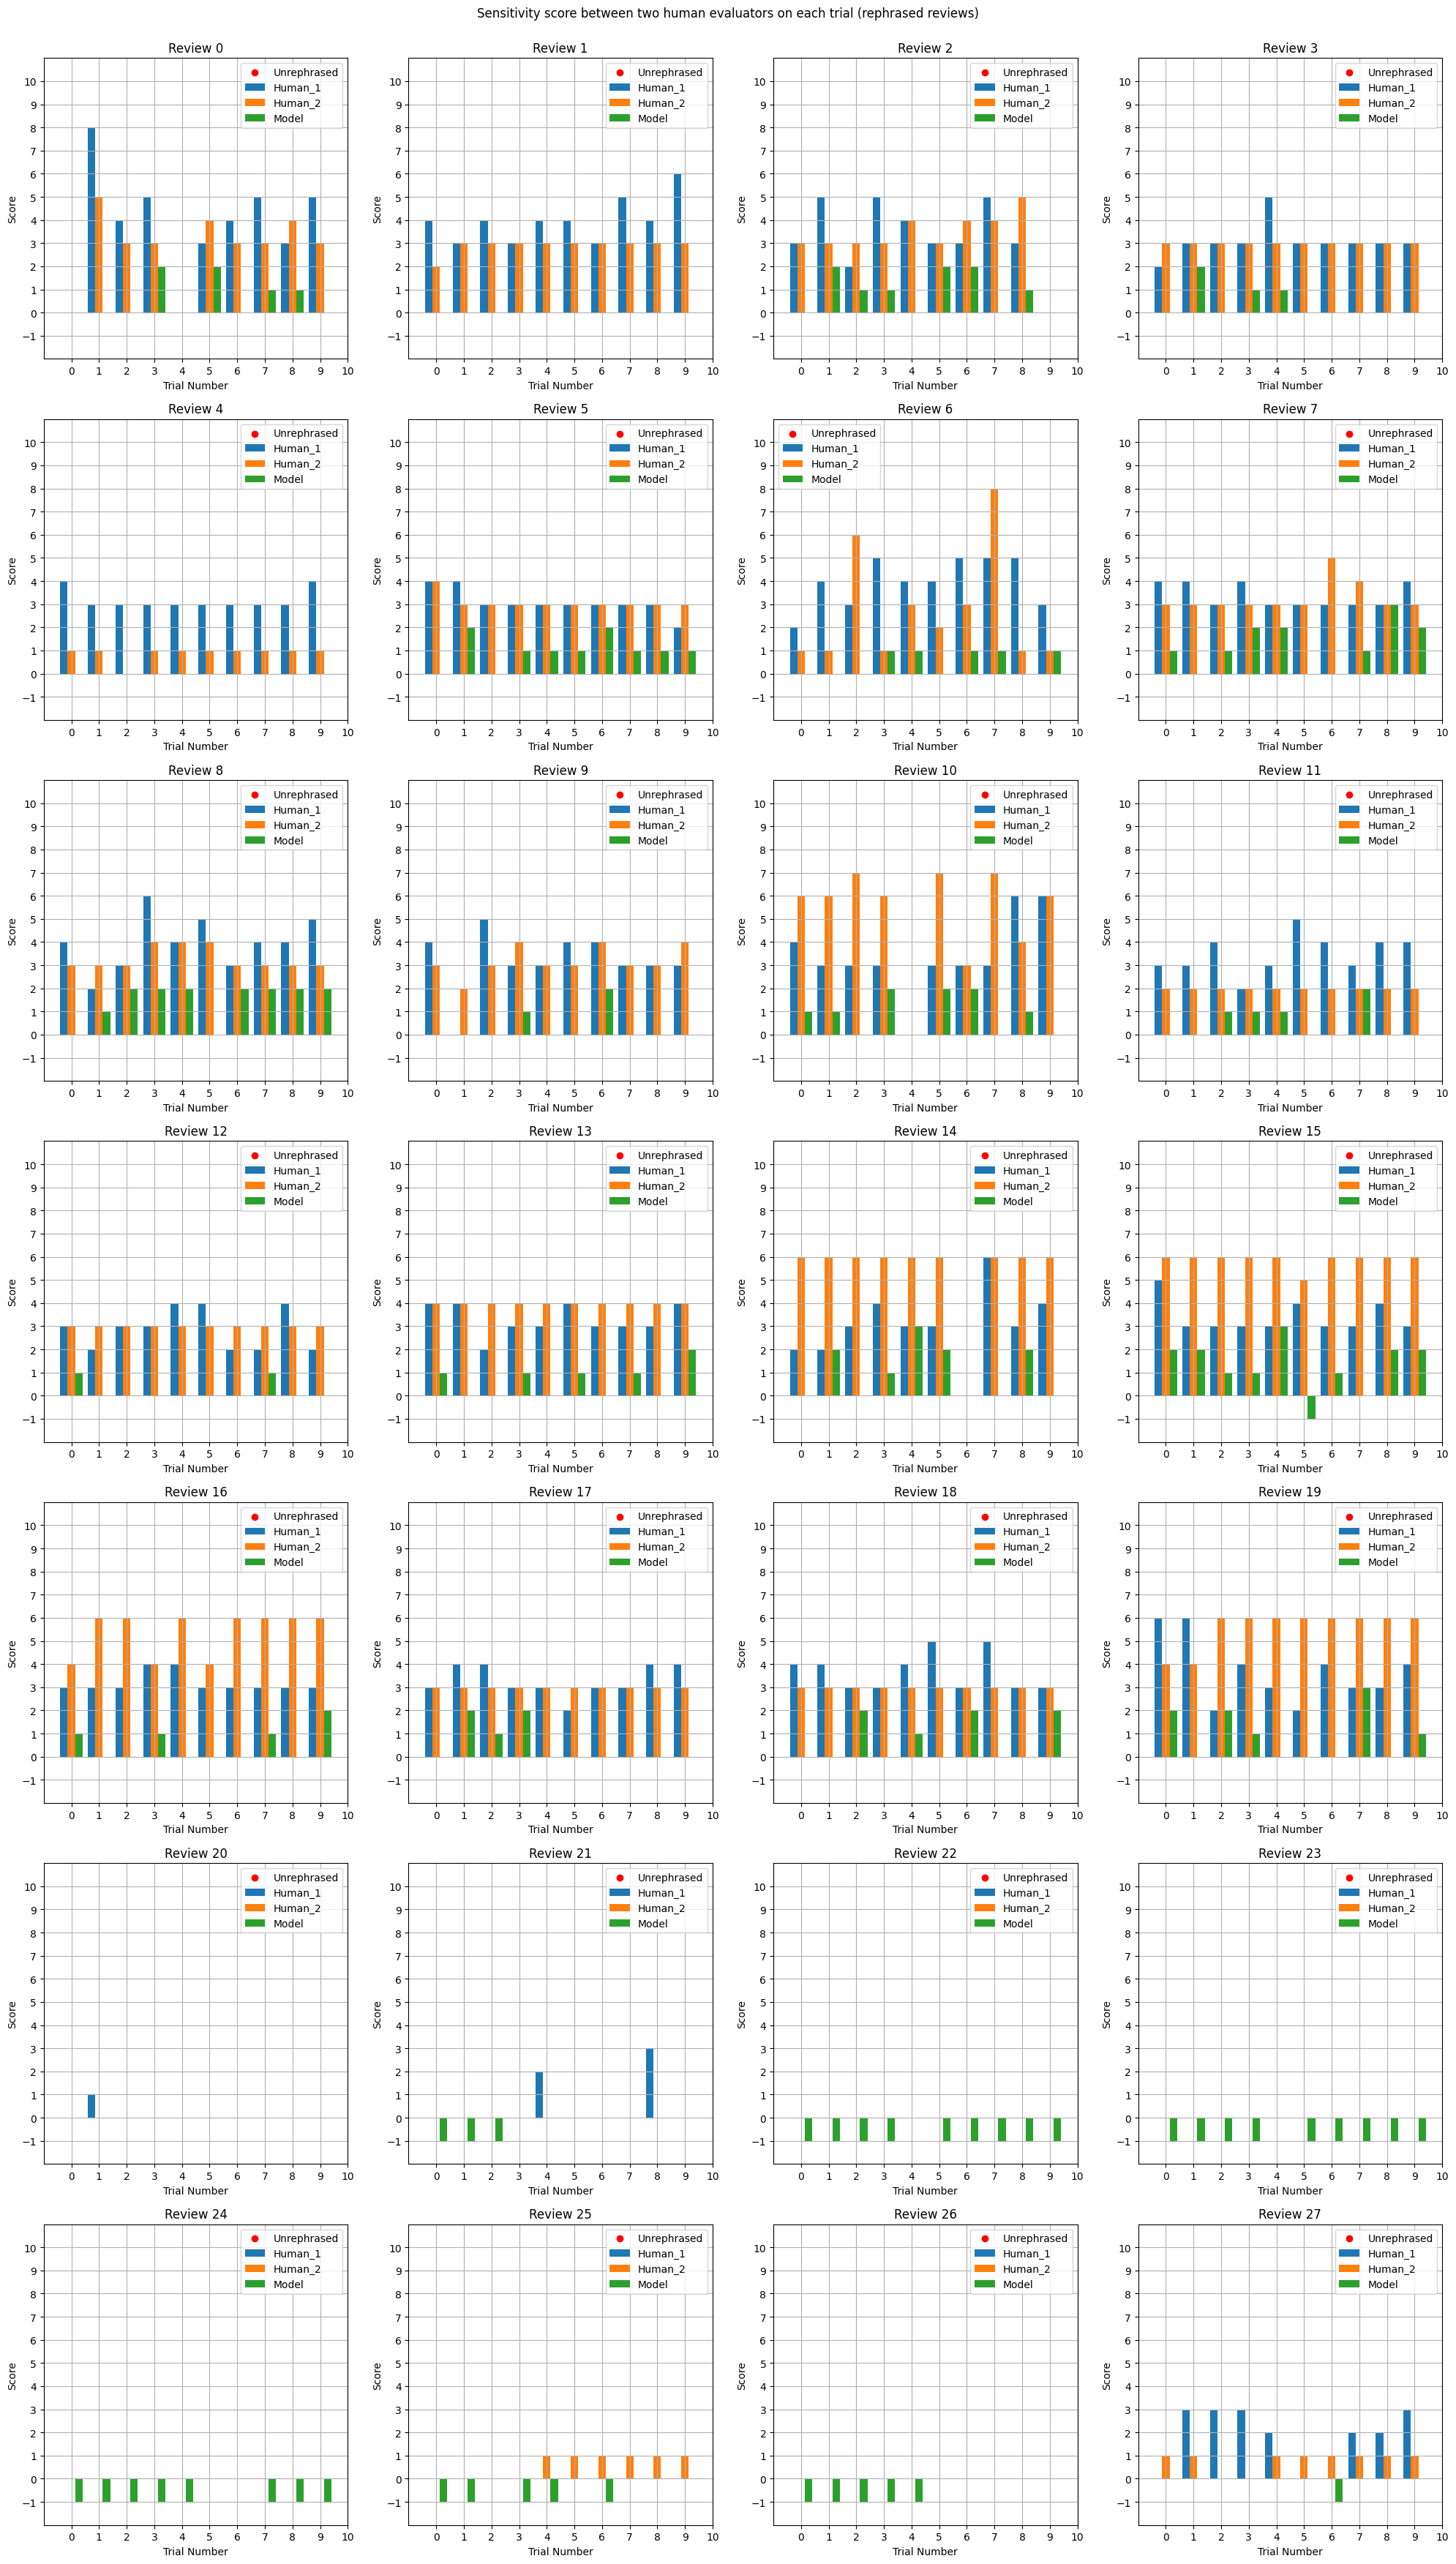

In [ ]:
unique_review_ids = df['review_id'].unique()
num_review_ids = len(unique_review_ids)
num_cols = 4  # Number of columns in the grid of subplots
num_rows = math.ceil(num_review_ids / num_cols)  # Number of rows needed

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 5*num_rows))

# Iterate over each unique review ID and plot in the subplots
for i, review_id in enumerate(unique_review_ids):
    row = i // num_cols
    col = i % num_cols

    # Filter data for the current review ID
    df_plt = df[df['review_id'] == review_id][['sens_reph', 'sens_orig', '2_sens_reph (0-10)', '2_sens_or (0-10)', 'trial_no', 'sens_reph (0-10)']]
    df_plt.sort_values(by="trial_no", inplace=True)
    trial_numbers = df_plt['trial_no']#.sort_values()

    sens_reph_scores = df_plt['sens_reph (0-10)']
    sens_orig_scores = df_plt['2_sens_reph (0-10)']
    model_sens_orig_scores = df_plt['sens_reph']

    # Highlight missing values and values equal to -1
    highlighted_indices_reph = sens_reph_scores[sens_reph_scores == -1].index
    highlighted_indices_orig = sens_orig_scores[sens_orig_scores == -1].index

    # Find missing values
    missing_reph = np.isnan(sens_reph_scores)
    missing_orig = np.isnan(sens_orig_scores)



    # Plot scatter points

    ax = axs[row, col] if num_rows > 1 else axs[col]
    ax.bar(trial_numbers-0.27, sens_reph_scores, label='Human_1', width=0.27)
    ax.bar(trial_numbers, sens_orig_scores, label='Human_2', width=0.27)
    ax.bar(trial_numbers+0.27, model_sens_orig_scores, label='Model', width=0.27)

    #ax.scatter(trial_numbers, sens_orig_scores, marker='o', label='Model score')
    ax.scatter(trial_numbers[highlighted_indices_reph], sens_reph_scores[highlighted_indices_reph], marker='o', color='red', label='Unrephrased')
    ax.scatter(trial_numbers[highlighted_indices_orig], sens_orig_scores[highlighted_indices_orig], marker='o', color='red')

    # Plot missing values
    #ax.scatter(trial_numbers[missing_reph], sens_reph_scores[missing_reph], marker='x', color='red')#, label='Missing sens_reph')
    #ax.scatter(trial_numbers[missing_orig], sens_orig_scores[missing_orig], marker='x', color='red')#, label='Missing sens_orig')

    # Interpolate curve

    # Adding labels and title
    ax.set_xlabel('Trial Number')
    ax.set_ylabel('Score')
    ax.set_title(f'Review {review_id}')
    ax.legend()
    ax.grid(True)

      # Set limits to ensure all numbers are represented
    ax.set_ylim(-2, 11)
    ax.set_yticks(np.arange(-1, 11, 1))
    ax.set_xlim(-1,10)
    ax.set_xticks(np.arange(0, 11, 1))

fig.suptitle('Sensitivity score between two human evaluators on each trial (rephrased reviews)', y=1)
# Adjust layout and spacing
plt.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.2)  # Customize vertical and horizontal spacing between subplots
plt.savefig(output_path + 'comparison_sens_reph.png')
plt.show()

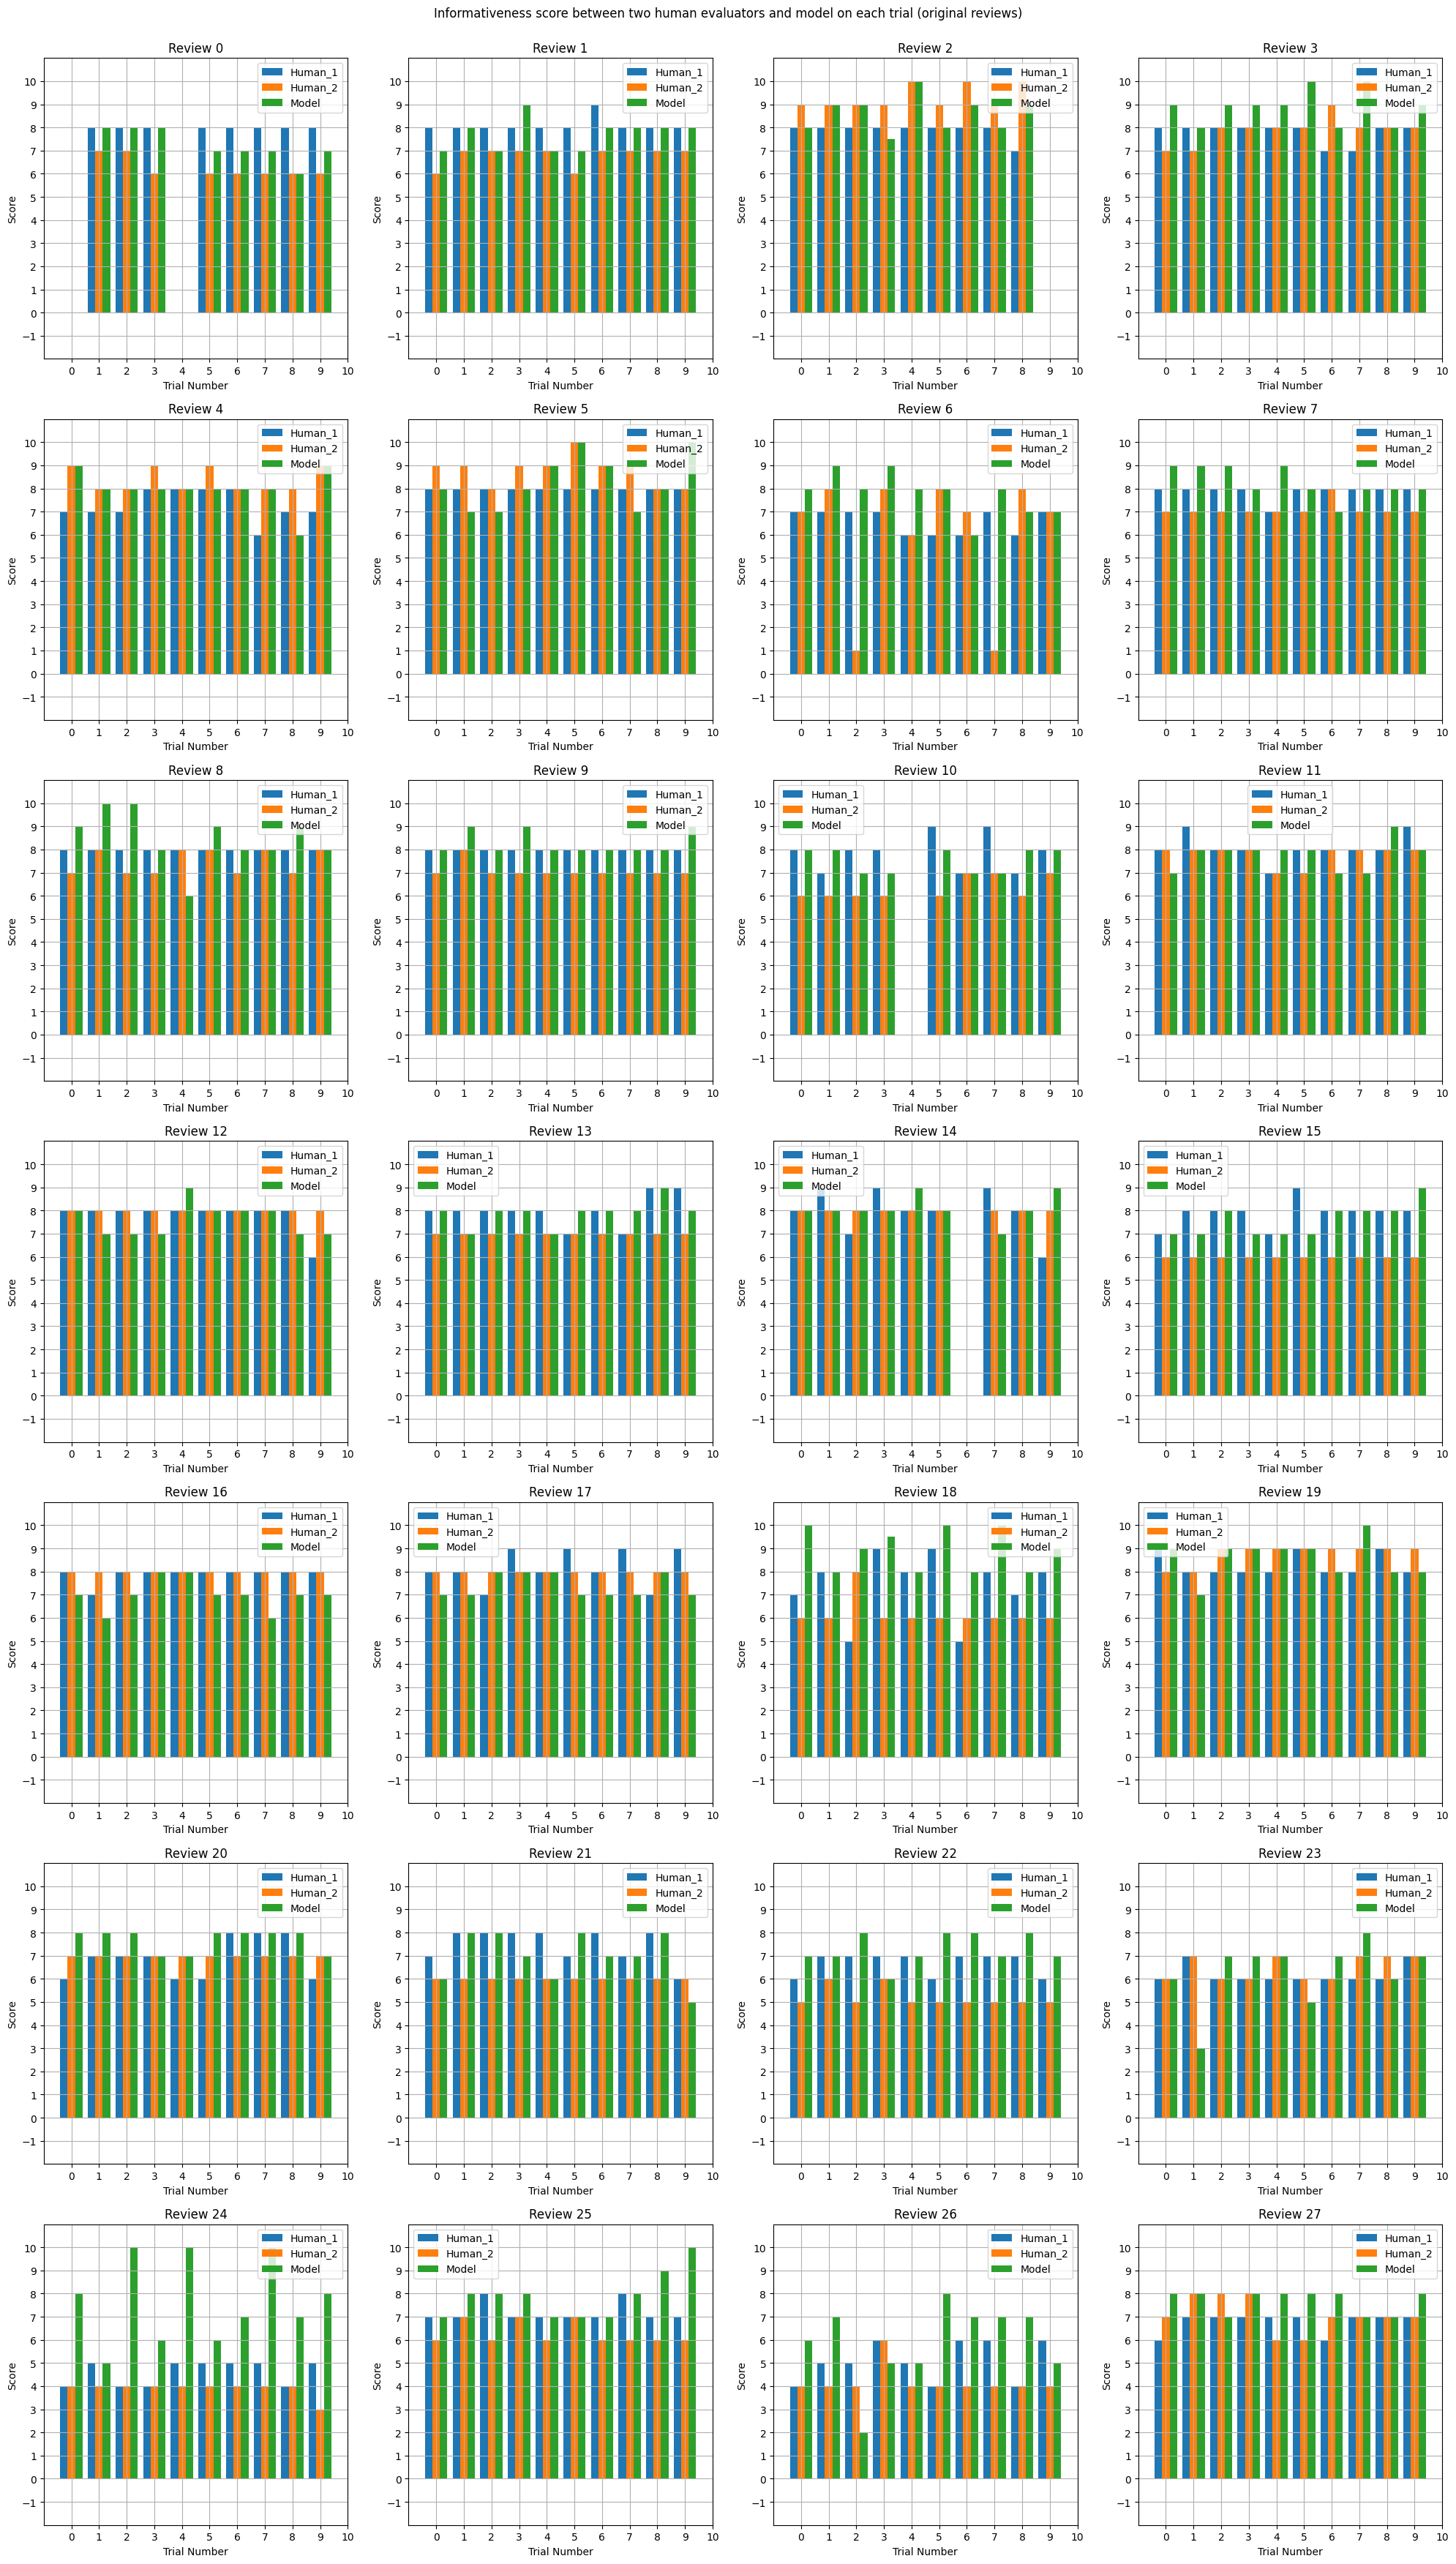

In [ ]:
########### SENS SCORE HHM ORIGINAL
unique_review_ids = df['review_id'].unique()
num_review_ids = len(unique_review_ids)
num_cols = 4  # Number of columns in the grid of subplots
num_rows = math.ceil(num_review_ids / num_cols)  # Number of rows needed

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 5*num_rows))

# Iterate over each unique review ID and plot in the subplots
for i, review_id in enumerate(unique_review_ids):
    row = i // num_cols
    col = i % num_cols

    # Filter data for the current review ID
    df_plt = df[df['review_id'] == review_id][['sens_reph', 'sens_orig', 'info_orig', 'info_reph','2_sens_reph (0-10)', '2_sens_or (0-10)', 'trial_no', 'sens_reph (0-10)', 'sens_or (0-10)', 'info_or (0-10)', '2_info_or (0-10)']]
    df_plt.sort_values(by="trial_no", inplace=True)
    trial_numbers = df_plt['trial_no']#.sort_values()
    sens_reph_scores = df_plt['info_or (0-10)']
    sens_orig_scores = df_plt['2_info_or (0-10)']
    model_sens_orig_scores = df_plt['info_orig']

    # Highlight missing values and values equal to -1
    highlighted_indices_reph = sens_reph_scores[sens_reph_scores == -1].index
    highlighted_indices_orig = sens_orig_scores[sens_orig_scores == -1].index

    # Find missing values
    missing_reph = np.isnan(sens_reph_scores)
    missing_orig = np.isnan(sens_orig_scores)



    # Plot scatter points
    ax = axs[row, col] if num_rows > 1 else axs[col]
    ax.bar(trial_numbers-0.27, sens_reph_scores, label='Human_1', width=0.27)
    ax.bar(trial_numbers, sens_orig_scores, label='Human_2', width=0.27)
    ax.bar(trial_numbers+0.27, model_sens_orig_scores, label='Model', width=0.27)

    #ax.scatter(trial_numbers, sens_orig_scores, marker='o', label='Model score')
    #ax.scatter(trial_numbers[highlighted_indices_reph], sens_reph_scores[highlighted_indices_reph], marker='o', color='red', label='Unrephrased')
    #ax.scatter(trial_numbers[highlighted_indices_orig], sens_orig_scores[highlighted_indices_orig], marker='o', color='red')
    # Plot missing values
    ax.scatter(trial_numbers[missing_reph], sens_reph_scores[missing_reph], marker='x', color='red')#, label='Missing sens_reph')
    ax.scatter(trial_numbers[missing_orig], sens_orig_scores[missing_orig], marker='x', color='red')#, label='Missing sens_orig')

    # Interpolate curve


    # Adding labels and title
    ax.set_xlabel('Trial Number')
    ax.set_ylabel('Score')
    ax.set_title(f'Review {review_id}')
    ax.legend()
    ax.grid(True)

    # Set limits to ensure all numbers are represented
    ax.set_ylim(-2, 11)
    ax.set_yticks(np.arange(-1, 11, 1))
    ax.set_xlim(-1,10)
    ax.set_xticks(np.arange(0, 11, 1))

fig.suptitle('Informativeness score between two human evaluators and model on each trial (original reviews)', y=1)
# Adjust layout and spacing
plt.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.2)  # Customize vertical and horizontal spacing between subplots
plt.savefig(output_path + 'comparison_info_or.png')
plt.show()

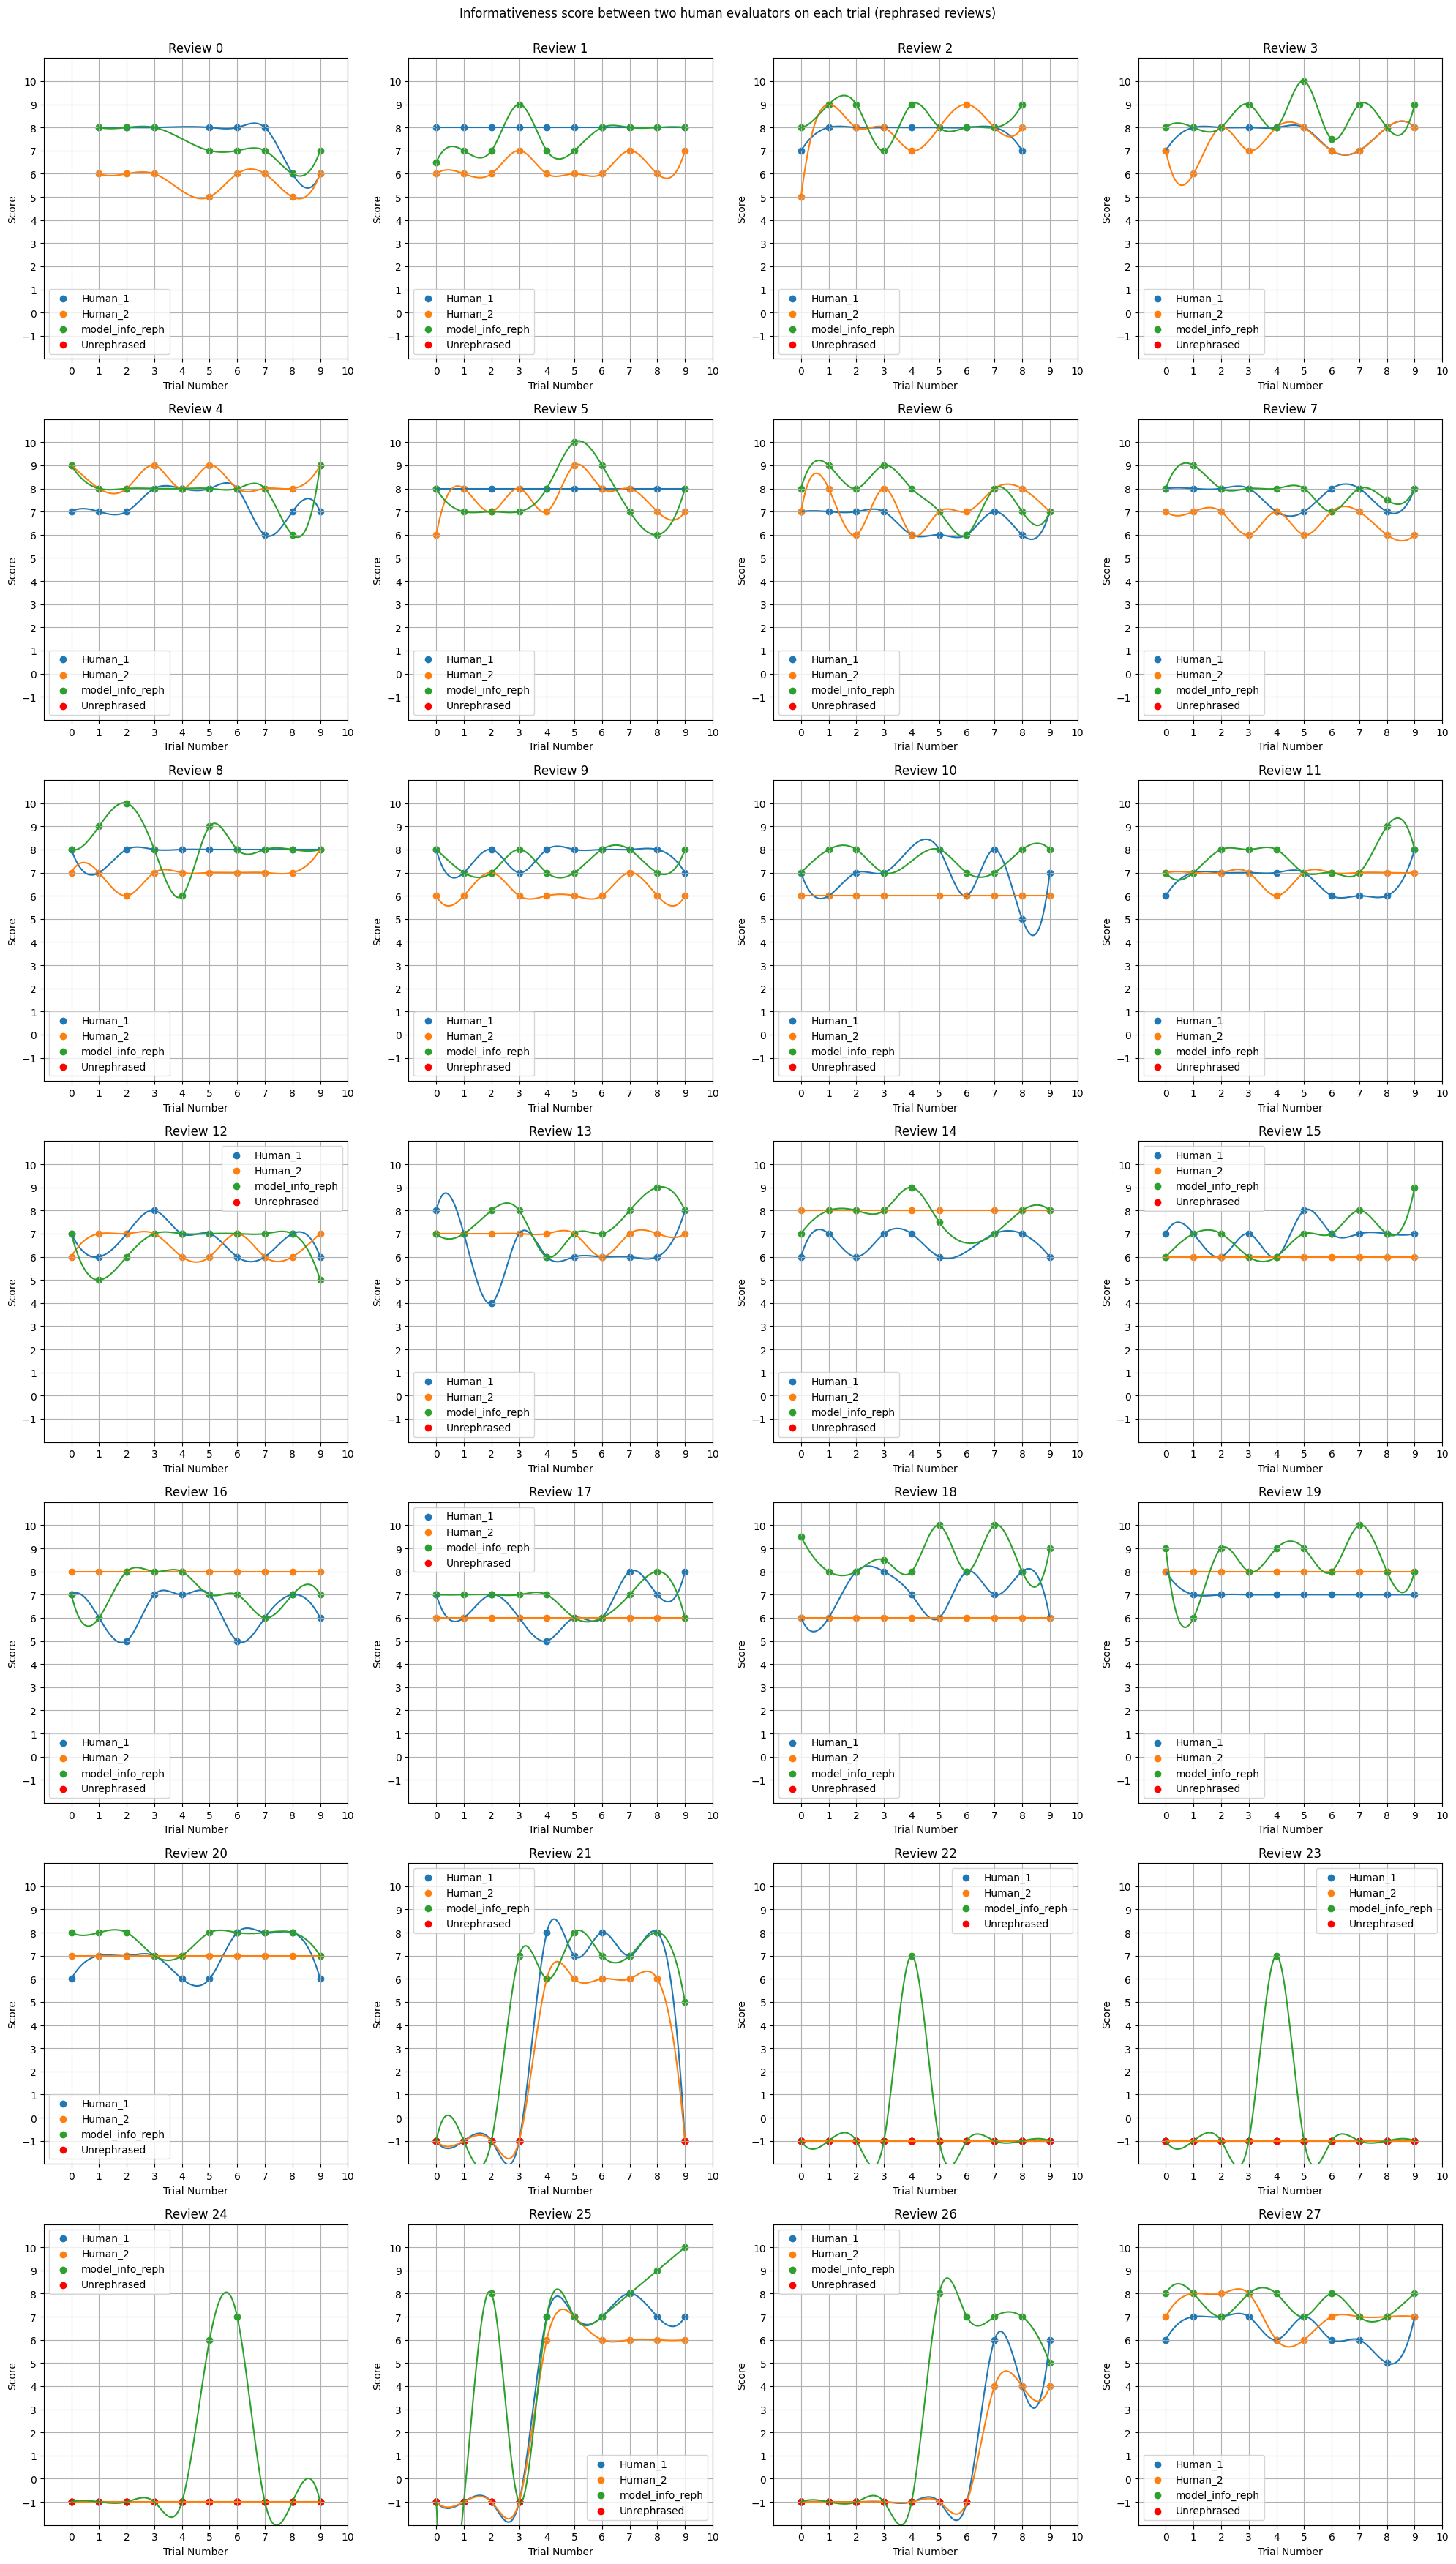

In [ ]:
unique_review_ids = df['review_id'].unique()
num_review_ids = len(unique_review_ids)
num_cols = 4  # Number of columns in the grid of subplots
num_rows = math.ceil(num_review_ids / num_cols)  # Number of rows needed

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 5*num_rows))

# Iterate over each unique review ID and plot in the subplots
for i, review_id in enumerate(unique_review_ids):
    row = i // num_cols
    col = i % num_cols

    # Filter data for the current review ID
    df_plt = df[df['review_id'] == review_id][['sens_reph', 'sens_orig', 'info_orig', 'info_reph','2_sens_reph (0-10)', '2_sens_or (0-10)', 'trial_no', 'sens_reph (0-10)', 'sens_or (0-10)', 'info_or (0-10)', '2_info_or (0-10)', 'info_reph (0-10)', '2_info_reph (0-10)']]
    df_plt.sort_values(by="trial_no", inplace=True)
    trial_numbers = df_plt['trial_no']#.sort_values()

    sens_reph_scores = df_plt['info_reph (0-10)']
    sens_orig_scores = df_plt['2_info_reph (0-10)']
    model_sens_orig_scores = df_plt['info_reph']

    # Highlight missing values and values equal to -1
    highlighted_indices_reph = sens_reph_scores[sens_reph_scores == -1].index
    highlighted_indices_orig = sens_orig_scores[sens_orig_scores == -1].index

    # Find missing values
    missing_reph = np.isnan(sens_reph_scores)
    missing_orig = np.isnan(sens_orig_scores)



    # Plot scatter points

    ax = axs[row, col] if num_rows > 1 else axs[col]
    ax.scatter(trial_numbers, sens_reph_scores, marker='o', label='Human_1')
    ax.scatter(trial_numbers, sens_orig_scores, marker='o', label='Human_2')
    ax.scatter(trial_numbers, model_sens_orig_scores, marker='o', label='model_info_reph')

    #ax.scatter(trial_numbers, sens_orig_scores, marker='o', label='Model score')
    ax.scatter(trial_numbers[highlighted_indices_reph], sens_reph_scores[highlighted_indices_reph], marker='o', color='red', label='Unrephrased')
    ax.scatter(trial_numbers[highlighted_indices_orig], sens_orig_scores[highlighted_indices_orig], marker='o', color='red')

    # Plot missing values
    #ax.scatter(trial_numbers[missing_reph], sens_reph_scores[missing_reph], marker='x', color='red')#, label='Missing sens_reph')
    #ax.scatter(trial_numbers[missing_orig], sens_orig_scores[missing_orig], marker='x', color='red')#, label='Missing sens_orig')

    # Interpolate curve
    x_new = np.linspace(trial_numbers.min(), trial_numbers.max(), 300)
    spl_reph = make_interp_spline(trial_numbers, sens_reph_scores, k=3)
    spl_orig = make_interp_spline(trial_numbers, sens_orig_scores, k=3)
    spl_model = make_interp_spline(trial_numbers, model_sens_orig_scores, k=3)
    y_smooth_reph = spl_reph(x_new)
    y_smooth_orig = spl_orig(x_new)
    y_smooth_model = spl_model(x_new)

    # Plot curve
    ax.plot(x_new, y_smooth_reph)#, label='sens_reph curve', color='blue')
    ax.plot(x_new, y_smooth_orig)#, label='sens_reph_h curve', color='orange')
    ax.plot(x_new, y_smooth_model)

    # Adding labels and title
    ax.set_xlabel('Trial Number')
    ax.set_ylabel('Score')
    ax.set_title(f'Review {review_id}')
    ax.legend()
    ax.grid(True)

      # Set limits to ensure all numbers are represented
    ax.set_ylim(-2, 11)
    ax.set_yticks(np.arange(-1, 11, 1))
    ax.set_xlim(-1,10)
    ax.set_xticks(np.arange(0, 11, 1))


fig.suptitle('Informativeness score between two human evaluators on each trial (rephrased reviews)', y=1)
# Adjust layout and spacing
plt.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.2)  # Customize vertical and horizontal spacing between subplots
plt.savefig(output_path + 'comparison_info_reph.png')
plt.show()

## Boxplot

In [ ]:

data = r"/content/drive/MyDrive/rephrasing/old_reviews_28x10.csv"
old_df = pd.read_csv(data)
#select only sensitivity score for original reviews rated by H and M
df = old_df[['review_id', 'sens_orig']]
df_sens_h = df[['review_id', 'mean_sens_or (0-10)']]

In [ ]:
# df_CL.columns

In [ ]:
df_CL.shape

NameError: name 'df_CL' is not defined

In [ ]:
#add the column to distinguish between H and M and rename other columns
df_sens['evaluator'] = 'M'
df_sens_h['evaluator'] = 'H'
df_sens.rename(columns={'sens_orig' : 'sens'}, inplace=True)
df_sens_h.rename(columns={'mean_sens_or (0-10)' : 'sens'}, inplace=True)

<ipython-input-27-3fa8983a7ec5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sens['evaluator'] = 'M'
<ipython-input-27-3fa8983a7ec5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sens_h['evaluator'] = 'H'
<ipython-input-27-3fa8983a7ec5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sens.rename(columns={'s

In [ ]:
df_app =  df_sens.append(df_sens_h)

<ipython-input-28-b6db75156816>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_app =  df_sens.append(df_sens_h)


In [ ]:
binary_column = df_app['evaluator']

Text(0, 0.5, 'Sensitivity score')

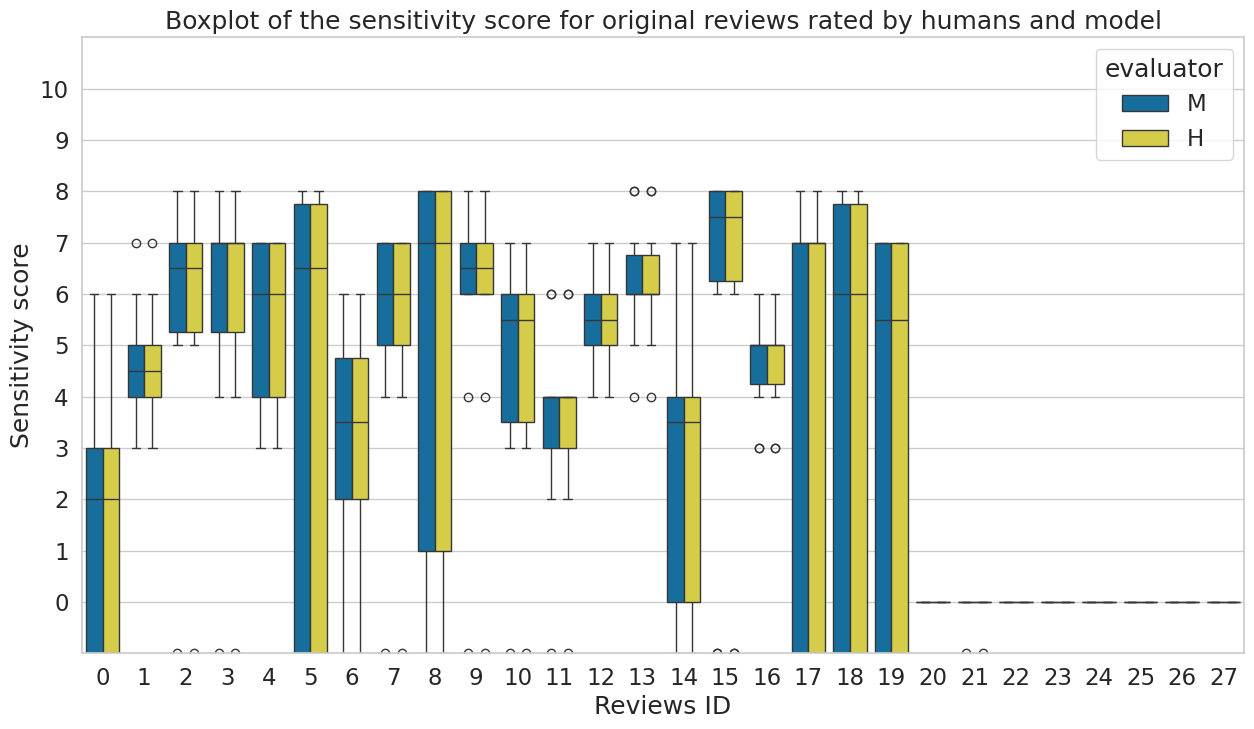

In [ ]:
fig = plt.figure(figsize =(15, 8))
sns.set_theme(style="whitegrid", palette= "colorblind", font_scale=1.5)
plt.title('Boxplot of the sensitivity score for original reviews rated by humans and model')
sns_plot = sns.boxplot(data=df_app, x="review_id", y="sens", hue="evaluator", palette=["b", "y"])
sns_plot.set_xlabel("Reviews ID")
sns_plot.set_ylim(-1, 11)
sns_plot.set_yticks(range(0, 11))
sns_plot.set_ylabel("Sensitivity score")
#plt.savefig(f"score_stability/sens_score_combined.png")

In [ ]:
sens_or = ['review_id','sens_orig']

In [ ]:
sens_or = ['review_id','sens_orig', 'mean_sens_or (0-10)']

In [ ]:
df_sens_or_h = df[['review_id', 'mean_sens_or (0-10)']]

In [ ]:
df_app_sens = df_sens_or.append(df_sens_or_h)

In [ ]:
df_app_sens.shape

In [ ]:
df_sens_or_h.head()

In [ ]:
df_sens_or = df[sens_score_or]

In [ ]:
df_sens_or.head()

In [ ]:
fig = plt.figure(figsize =(15, 8))
sns.set_theme(style="whitegrid", palette= "colorblind", font_scale=1.5)
plt.title('Boxplot of the sensitivity score for original and rephrased reviews')
sns_plot = sns.boxplot(data=df, x="review_id", y="sens", hue="review", palette=["b", "y"])
sns_plot.set_xlabel("Reviews ID")
sns_plot.set_ylim(-1, 11)
sns_plot.set_yticks(range(0, 11))
sns_plot.set_ylabel("Sensitivity score of ChatGPT")
plt.savefig(f"score_stability/sens_score_combined.png")

In [ ]:
!pip3 install nltk

In [ ]:
df.head()

,experiment_id,review_id,trial_no,review_text,rephrased_text,explanation,sens_orig_avg,sens_reph_avg,info_orig_avg,info_reph_avg,sens_orig_var,sens_reph_var,info_orig_var,info_reph_var,sens_orig,sens_reph,info_orig,info_reph,failed,detection,sens_or (0-10),sens_reph (0-10),info_or (0-10),info_reph (0-10),comments,2_detection,2_sens_or (0-10),2_sens_reph (0-10),2_info_or (0-10),2_info_reph (0-10),2_comments
0,20,0,1,My husbands ortho doctor suggested him using...,A medical professional suggested the use of Tu...,I removed explicit mention of the user being t...,5.625,0.75,7.25,7.25,2.553571,0.785714,0.5,0.5,3.0,0,8.0,8.0,False,N,8,8.0,8,8.0,"the rephrasing is the same, the detection is a...",N,6,5.0,7,6.0,nearly the same
1,20,0,2,My husbands ortho doctor suggested him using...,A health professional recommended this Turmeri...,I replaced specific reference to the husband's...,5.625,0.75,7.25,7.25,2.553571,0.785714,0.5,0.5,5.0,0,8.0,8.0,False,Y,8,4.0,8,8.0,NaN,Y,7,3.0,7,6.0,NaN
2,20,0,3,My husbands ortho doctor suggested him using...,Turmeric Curcumin was suggested to help with k...,The rephrased review does not directly state t...,5.625,0.75,7.25,7.25,2.553571,0.785714,0.5,0.5,6.0,2,8.0,8.0,False,Y,8,5.0,8,8.0,NaN,Y,6,3.0,6,6.0,NaN
3,20,0,5,My husbands ortho doctor suggested him using...,This Turmeric Curcumin product was recommended...,"In the sanitized version, I've omitted the spe...",5.625,0.75,7.25,7.25,2.553571,0.785714,0.5,0.5,6.0,2,7.0,7.0,False,Y,8,3.0,8,8.0,NaN,Y,6,4.0,6,5.0,NaN
4,20,0,6,My husbands ortho doctor suggested him using...,This Turmeric Curcumin product was suggested b...,"The health status of the reviewer’s husband, h...",5.625,0.75,7.25,7.25,2.553571,0.785714,0.5,0.5,7.0,0,7.0,7.0,False,Y,7,4.0,8,8.0,NaN,Y,6,3.0,6,6.0,NaN


In [ ]:
from nltk.translate import bleu_score as bs
d = data


def get_bleu(r1):
    # print(r1[0])
    try:
      return bs.sentence_bleu([r1[0].split(' ')],r1[1].split(' '))
    except:
      # print(r1[0])
      return 1


# print(get_bleu(("This is a sentence","This is a sentence")))

df["bleu"] = df[["review_text","rephrased_text"]].apply(lambda x: get_bleu(x), axis=1)
df["bleu"].std()

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

0.385613381338645

In [ ]:
def get_bleu(r1):
    # print(r1[0])
    try:
      return bs.sentence_bleu([r1[0].split(' ')],r1[1].split(' '))
    except:
      return 0



df["bleu"] = df[["review_text","rephrased_text"]].apply(lambda x: get_bleu(x), axis=1)

In [ ]:
 !pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=5f53919b1ef45c14b8416b10e052dbda18dcd31f38f20c3395db6722bfe947a5
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [ ]:
from rouge_score import rouge_scorer


def get_rouge1(r1,m):
    scorer = rouge_scorer.RougeScorer([m],use_stemmer=True)
    # print(r1[0])
    try:
      r = scorer.score(r1[0],r1[1])
      # print(r[m])
      return {
          f'{m}_precision': r[m].precision,
          f'{m}_recall': r[m].recall,
          f'{m}_fmeasure': r[m].fmeasure,
      }
    except:
      print("Fail")
      return {
          f'{m}_precision': 0,
          f'{m}_recall': 0,
          f'{m}_fmeasure': 0,
      }


for eval_method in ['rouge1','rouge2','rougeL']:
  resp = df[["review_text","rephrased_text"]].apply(lambda x: get_rouge1(x,eval_method), axis=1, result_type='expand')
  df = pd.concat([df, resp],axis='columns')


Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail


In [ ]:
df.head()

,experiment_id,review_id,trial_no,review_text,rephrased_text,explanation,sens_orig_avg,sens_reph_avg,info_orig_avg,info_reph_avg,sens_orig_var,sens_reph_var,info_orig_var,info_reph_var,sens_orig,sens_reph,info_orig,info_reph,failed,detection,sens_or (0-10),sens_reph (0-10),info_or (0-10),info_reph (0-10),comments,2_detection,2_sens_or (0-10),2_sens_reph (0-10),2_info_or (0-10),2_info_reph (0-10),2_comments,new_col,bleu,rouge1,rouge2,rougeL,rouge1_precision,rouge1_recall,rouge1_fmeasure,rouge2_precision,rouge2_recall,rouge2_fmeasure,rougeL_precision,rougeL_recall,rougeL_fmeasure
0,20,0,1,My husbands ortho doctor suggested him using...,A medical professional suggested the use of Tu...,I removed explicit mention of the user being t...,5.625,0.75,7.25,7.25,2.553571,0.785714,0.5,0.5,3.0,0,8.0,8.0,False,N,8,8.0,8,8.0,"the rephrasing is the same, the detection is a...",N,6,5.0,7,6.0,nearly the same,0,3.582799e-01,0.640000,0.428571,0.620000,0.640000,0.666667,0.653061,0.428571,0.446809,0.437500,0.620000,0.645833,0.632653
1,20,0,2,My husbands ortho doctor suggested him using...,A health professional recommended this Turmeri...,I replaced specific reference to the husband's...,5.625,0.75,7.25,7.25,2.553571,0.785714,0.5,0.5,5.0,0,8.0,8.0,False,Y,8,4.0,8,8.0,NaN,Y,7,3.0,7,6.0,NaN,0,4.747039e-155,0.461538,0.105263,0.358974,0.461538,0.375000,0.413793,0.105263,0.085106,0.094118,0.358974,0.291667,0.321839
2,20,0,3,My husbands ortho doctor suggested him using...,Turmeric Curcumin was suggested to help with k...,The rephrased review does not directly state t...,5.625,0.75,7.25,7.25,2.553571,0.785714,0.5,0.5,6.0,2,8.0,8.0,False,Y,8,5.0,8,8.0,NaN,Y,6,3.0,6,6.0,NaN,0,2.364420e-78,0.560976,0.275000,0.390244,0.560976,0.479167,0.516854,0.275000,0.234043,0.252874,0.390244,0.333333,0.359551
3,20,0,5,My husbands ortho doctor suggested him using...,This Turmeric Curcumin product was recommended...,"In the sanitized version, I've omitted the spe...",5.625,0.75,7.25,7.25,2.553571,0.785714,0.5,0.5,6.0,2,7.0,7.0,False,Y,8,3.0,8,8.0,NaN,Y,6,4.0,6,5.0,NaN,0,3.200304e-155,0.305556,0.057143,0.194444,0.305556,0.229167,0.261905,0.057143,0.042553,0.048780,0.194444,0.145833,0.166667
4,20,0,6,My husbands ortho doctor suggested him using...,This Turmeric Curcumin product was suggested b...,"The health status of the reviewer’s husband, h...",5.625,0.75,7.25,7.25,2.553571,0.785714,0.5,0.5,7.0,0,7.0,7.0,False,Y,7,4.0,8,8.0,NaN,Y,6,3.0,6,6.0,NaN,0,3.563305e-155,0.411765,0.090909,0.235294,0.411765,0.291667,0.341463,0.090909,0.063830,0.075000,0.235294,0.166667,0.195122


In [ ]:
agg = pd.DataFrame(
    {
        "Mean" : [df["rougeL_precision"].mean(),df["rougeL_recall"].mean(),df["rougeL_fmeasure"].mean()],
        "Median" : [df["rougeL_precision"].median(),df["rougeL_recall"].median(),df["rougeL_fmeasure"].median()],
        "St Dev" : [df["rougeL_precision"].std(),df["rougeL_recall"].std(),df["rougeL_fmeasure"].std()],
    },
        index=(["RougeL_precision", "RougeL_recall","RougeL_fmeasure"])

)

In [ ]:
print(agg.style.to_latex())

\begin{tabular}{lrrr}
 & Mean & Median & St Dev \\
RougeL_precision & 0.422417 & 0.412698 & 0.272929 \\
RougeL_recall & 0.361579 & 0.323077 & 0.272239 \\
RougeL_fmeasure & 0.384240 & 0.347826 & 0.271241 \\
\end{tabular}


In [ ]:
print(df["bleu"].mean())
print(df["bleu"].median())
print(df["bleu"].std())

0.17986266233674136
0.06873632942639893
0.2632272662506846


<ipython-input-73-76f6b6c7d4ad>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sens['evaluator'] = 'M'
<ipython-input-73-76f6b6c7d4ad>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sens_h['evaluator'] = 'H'
<ipython-input-73-76f6b6c7d4ad>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sens.rename(columns={'

Text(0, 0.5, 'Sensitivity score')

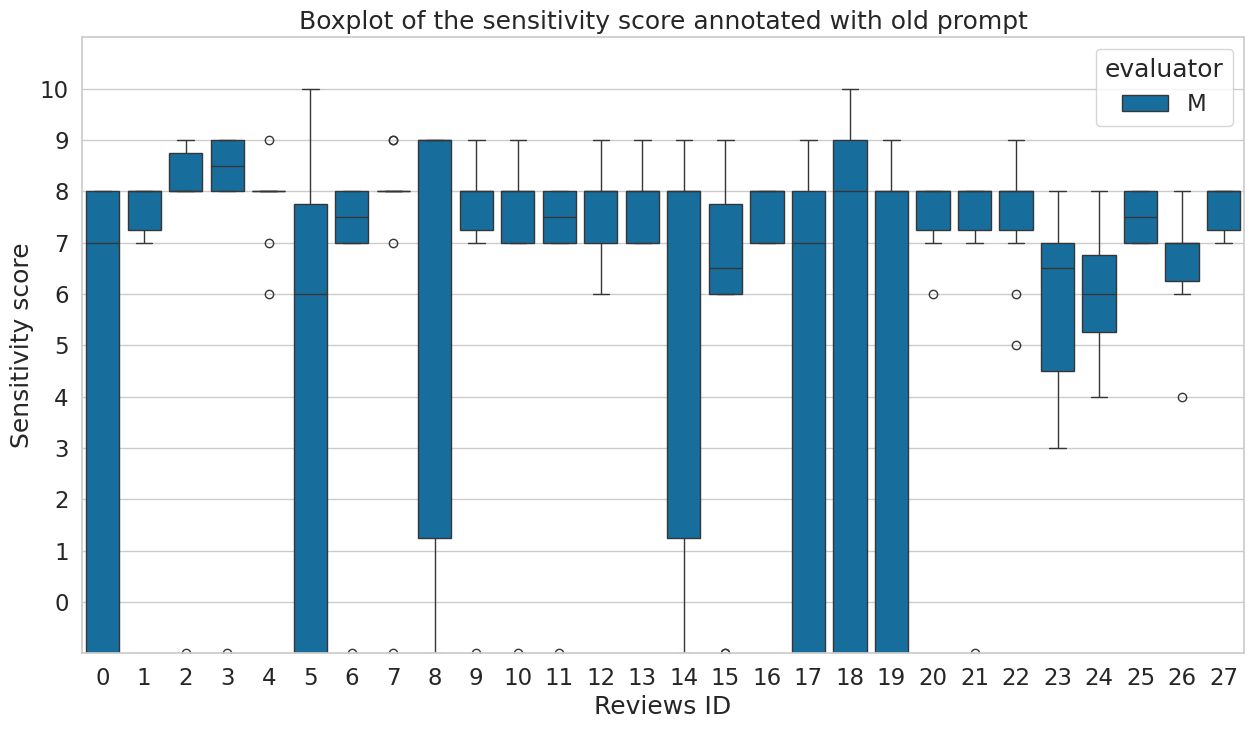

In [ ]:


data = r"/content/drive/MyDrive/rephrasing/old_reviews_28x10.csv"
old_df = pd.read_csv(data)
#select only sensitivity score for original reviews rated by H and M
df_sens = old_df[['review_id', 'info_orig']]
df_sens_h = old_df[['review_id', 'sens_orig_avg']]

#add the column to distinguish between H and M and rename other columns
# df_sens['evaluator'] = 'M'
# df_sens_h['evaluator'] = 'H'
# df_sens.rename(columns={'sens_orig' : 'sens'}, inplace=True)
# df_sens_h.rename(columns={'sens_orig_avg' : 'sens'}, inplace=True)
df_app =  df_sens
binary_column = df_app['evaluator']

fig = plt.figure(figsize =(15, 8))
sns.set_theme(style="whitegrid", palette= "colorblind", font_scale=1.5)
plt.title('Boxplot of the sensitivity score annotated with old prompt')
sns_plot = sns.boxplot(data=df_app, x="review_id", y="info_orig", hue="evaluator", palette=["b"])
sns_plot.set_xlabel("Reviews ID")
sns_plot.set_ylim(-1, 11)
sns_plot.set_yticks(range(0, 11))
sns_plot.set_ylabel("Sensitivity score")
#plt.savefig(f"score_stability/sens_score_combined.png")